In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import os
import random

FOLDER = "fashion-mnist"
theSIZE = (28, 28)
theLENGTH = 28*28

# will be non-empty if we are in the directory already
if os.path.exists(FOLDER):
    os.chdir(FOLDER)
elif os.getcwd().split('/')[-1] != FOLDER:
    print("The dataset is not in the current directory, cloning git repo...")
    os.system("git clone https://github.com/zalandoresearch/fashion-mnist")
    os.chdir(FOLDER)

from utils import mnist_reader

x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train.dtype)

(60000, 784) (10000, 784) (60000,) (10000,)
uint8


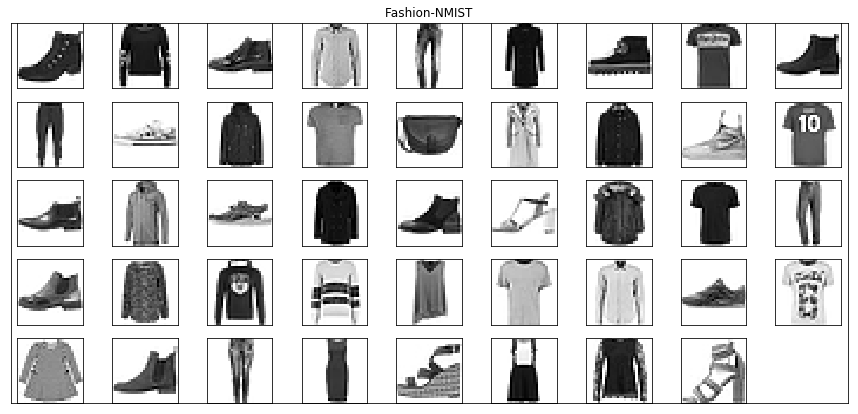

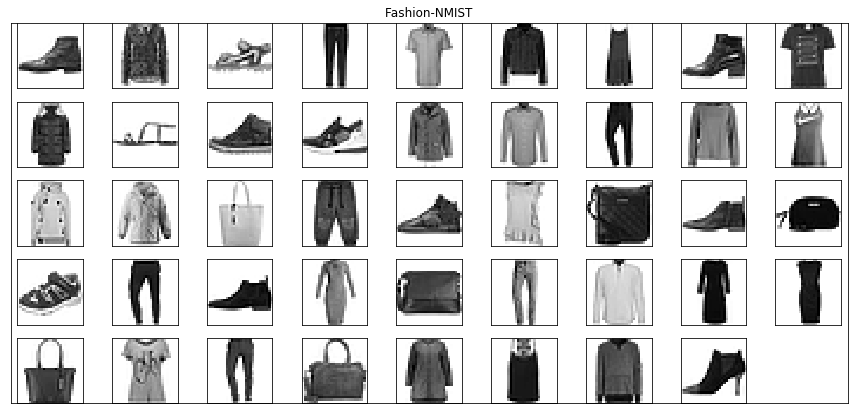

In [3]:
def show_imgs(images, columns=9, figsize=(15,7), title=''):
    fig=plt.figure(figsize=figsize)
    f = plt.title(title)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
    rows = np.ceil(len(images)/columns).astype('int')
    for i in range(1, len(images)):
        fig.add_subplot(rows, columns, i)
        f = plt.imshow(images[i], cmap=plt.cm.binary)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
    
show_imgs([random.choice(x_train).reshape(theSIZE) for i in range(45)], title='Fashion-NMIST')
r = random.randint(0,len(x_train)-45)
show_imgs(x_train[r:r+45].reshape(45, *theSIZE), title='Fashion-NMIST')

The dataset comes in nicely shuffled and the pictures are already representet by vectors, they are not normalized though...

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
def make_model(neurons, activations):
    model = keras.models.Sequential()
    import collections
    zzz = zip(neurons, activations)
    n, a = next(zzz)
    model.add(keras.layers.Dense(n, input_shape=(theLENGTH,), activation=a))
    for n, a in zzz:
        model.add(keras.layers.Dense(n, activation=a))
    model.summary()
    
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [6]:
def plot_history(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = hist.epoch

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.8302 - acc: 0.7402 - val_loss: 0.6519 - val_acc: 0.7825
Epoch 2/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.5944 - acc: 0.8066 - val_loss: 0.5906 - val_acc: 0.7990
Epoch 3/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.5448 - acc: 0.8199 - val_loss: 0.5523 - val_acc: 0.8153
Epoch 4/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.5176 - acc: 0.8277 - val_loss: 0.5322 - val_acc: 0.8200
Epoch 5/30
60000/60000 [==============================] - 2s 30us/step

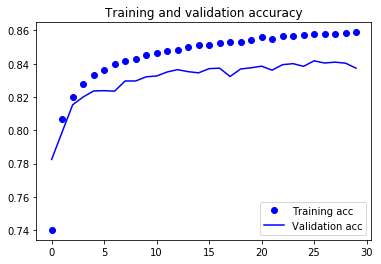

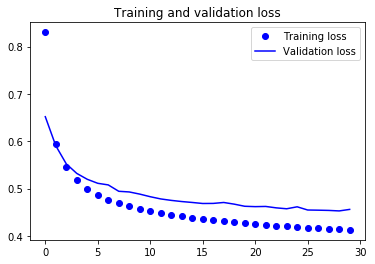

In [7]:
model = make_model((10,), ('softmax',))
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test,y_test))
plot_history(hist)

Such a simple one and works surprisingly good in my opinion (although, not as good as its original NMIST brother...), but it seems to be just overfitting the data and not 'understanding' them...

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.7605 - acc: 0.7529 - val_loss: 0.6049 - val_acc: 0.7849
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.5244 - acc: 0.8213 - val_loss: 0.5197 - val_acc: 0.8212
Epoch 3/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.4766 - acc: 0.8370 - val_loss: 0.4817 - val_acc: 0.8310
Epoch 4/50
60000/60000 [==============================] - 2s 40us/step - 

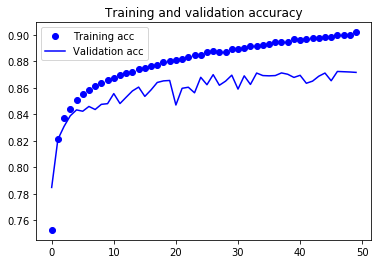

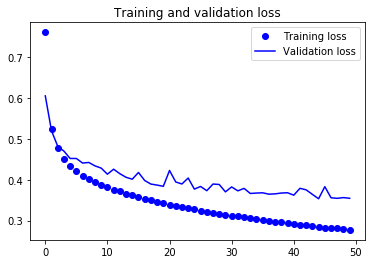

In [8]:
model = make_model((50,10), ('relu', 'softmax',))
hist = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

plot_history(hist)

Again the validation dataset seems to stagnate, and with many more parameters not much improvement here...

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/75
60000/60000 [==============================] - 4s 61us/step - loss: 0.7437 - acc: 0.7531 - val_loss: 0.5499 - val_acc: 0.8110
Epoch 2/75
60000/60000 [==============================] - 4s 60us/step - loss: 0.5012 - acc: 0.8254 - val_loss: 0.5024 - val_acc: 0.8257
Epoch 3/75
60000/60000 [==============================] - 3s 53us/step - loss:

Epoch 55/75
60000/60000 [==============================] - 3s 52us/step - loss: 0.1906 - acc: 0.9302 - val_loss: 0.3450 - val_acc: 0.8846
Epoch 56/75
60000/60000 [==============================] - 3s 52us/step - loss: 0.1897 - acc: 0.9313 - val_loss: 0.3324 - val_acc: 0.8856
Epoch 57/75
60000/60000 [==============================] - 3s 52us/step - loss: 0.1874 - acc: 0.9316 - val_loss: 0.3320 - val_acc: 0.8892
Epoch 58/75
60000/60000 [==============================] - 3s 52us/step - loss: 0.1864 - acc: 0.9319 - val_loss: 0.3427 - val_acc: 0.8813
Epoch 59/75
60000/60000 [==============================] - 3s 52us/step - loss: 0.1840 - acc: 0.9329 - val_loss: 0.3469 - val_acc: 0.8794
Epoch 60/75
60000/60000 [==============================] - 3s 52us/step - loss: 0.1822 - acc: 0.9345 - val_loss: 0.3413 - val_acc: 0.8852
Epoch 61/75
60000/60000 [==============================] - 3s 52us/step - loss: 0.1795 - acc: 0.9351 - val_loss: 0.3359 - val_acc: 0.8870
Epoch 62/75
60000/60000 [=========

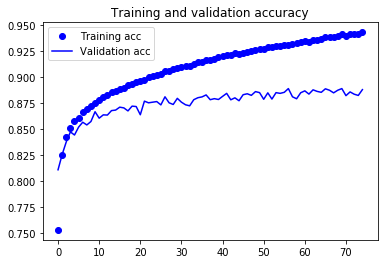

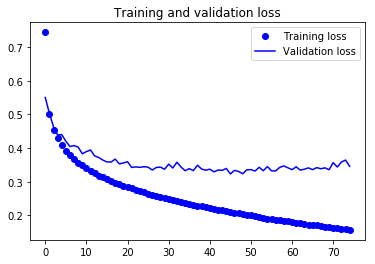

In [9]:
model = make_model((100, 100, 10), ('relu', 'relu', 'softmax',))
hist = model.fit(x_train, y_train, epochs=75, batch_size=32, validation_data=(x_test,y_test))

plot_history(hist)

The same old case, let's try a bit deeper one

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 127,658
Trainable params: 127,658
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 4s 74us/step - loss: 0.7866

Epoch 111/120
60000/60000 [==============================] - 4s 65us/step - loss: 0.0520 - acc: 0.9806 - val_loss: 0.5906 - val_acc: 0.8830
Epoch 112/120
60000/60000 [==============================] - 4s 66us/step - loss: 0.0517 - acc: 0.9816 - val_loss: 0.6247 - val_acc: 0.8864
Epoch 113/120
60000/60000 [==============================] - 4s 65us/step - loss: 0.0498 - acc: 0.9813 - val_loss: 0.6393 - val_acc: 0.8822
Epoch 114/120
60000/60000 [==============================] - 4s 63us/step - loss: 0.0508 - acc: 0.9816 - val_loss: 0.6750 - val_acc: 0.8677
Epoch 115/120
60000/60000 [==============================] - 4s 64us/step - loss: 0.0490 - acc: 0.9815 - val_loss: 0.6323 - val_acc: 0.8846
Epoch 116/120
60000/60000 [==============================] - 4s 63us/step - loss: 0.0467 - acc: 0.9831 - val_loss: 0.6483 - val_acc: 0.8847
Epoch 117/120
60000/60000 [==============================] - 4s 65us/step - loss: 0.0476 - acc: 0.9829 - val_loss: 0.6196 - val_acc: 0.8804
Epoch 118/120
60000/

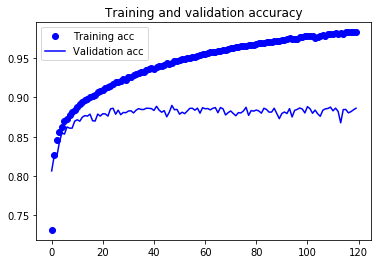

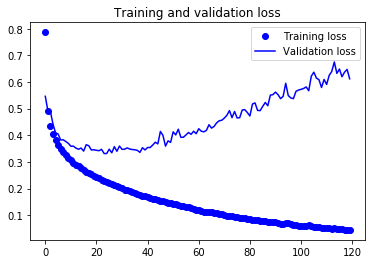

In [11]:
model = make_model((128, 128, 64, 32, 10),
                   ('relu', 'relu', 'relu', 'relu', 'softmax',))
hist = model.fit(x_train, y_train, epochs=120, batch_size=32, validation_data=(x_test,y_test))

plot_history(hist)

Interestingly, after about 15-30 epochs the validation loss obviously starts to increase. When I have been looking at the benchmarks on this dataset, the accuracy reached was most of the time about 90%, in some cases even 95%, and when I have been looking at the images I had real troubles categorizing some of them and seems that the human accuracy here is just 83,5% - just like the model with only 10 neurons (which makes me feel slightly anxious).
With other networks the results were similar and I have not got over 90% accuracy.